## Módulo de entrada e saída de dados (es)

O módulo proverá uma função para leitura de API do Bacen e para produção dos gráficos

In [17]:
#Função para consumo da API do Bacen

import numpy as np
import pandas as pd


def leitor_dados(arquivo: str) -> pd.DataFrame:
    return pd.read_csv(arquivo)

In [18]:
url = "https://dados.tce.rs.gov.br/dados/municipal/balancete-despesa/2023.csv"
dados = leitor_dados(url)

In [19]:
dados.head(4)

,ANO,MES,COD_MUNICIPIO,NOME_MUNICIPIO,CD_ORGAO,NOME_ORGAO,CD_RECEBIMENTO,CD_ORGAO_ORCAMENTARIO,NOME_ORGAO_ORCAMENTARIO,CD_UNIDADE_ORCAMENTARIA,...,VL_REDUCAO_RECURSO,VL_TRANSFERENCIA,VL_TRANSPOSICAO,VL_REMANEJAMENTO,VL_EMPENHADO,VL_LIQUIDADO,VL_PAGO,VL_LIMITADO,VL_RECOMPOSICAO,VL_PREVISAO_EXECUCAO
0,2023,1,149,PORTO ALEGRE,88399,AGESAN - AGÊNCIA REGULADORA INTERMUNICIPAL DE ...,306703,1,AGESAN-RS,1,...,0.0,0.0,0.0,0.0,1291047.08,99401.81,99401.81,0.0,0.0,0.0
1,2023,1,149,PORTO ALEGRE,88399,AGESAN - AGÊNCIA REGULADORA INTERMUNICIPAL DE ...,306703,1,AGESAN-RS,1,...,0.0,0.0,0.0,0.0,251900.00,30456.87,0.00,0.0,0.0,0.0
2,2023,1,149,PORTO ALEGRE,88399,AGESAN - AGÊNCIA REGULADORA INTERMUNICIPAL DE ...,306703,1,AGESAN-RS,1,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
3,2023,1,149,PORTO ALEGRE,88399,AGESAN - AGÊNCIA REGULADORA INTERMUNICIPAL DE ...,306703,1,AGESAN-RS,1,...,0.0,0.0,0.0,0.0,6206.47,6206.47,6206.47,0.0,0.0,0.0


In [24]:
dados[["VL_EMPENHADO","VL_LIQUIDADO","VL_PAGO"]].describe()

,VL_EMPENHADO,VL_LIQUIDADO,VL_PAGO
count,4.276280e+05,4.276280e+05,4.276280e+05
mean,1.382644e+05,1.209877e+05,1.168090e+05
std,2.023172e+06,1.836041e+06,1.806534e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.800000e+02,6.252500e+01,0.000000e+00
75%,2.600798e+04,2.150328e+04,2.009411e+04
max,5.291985e+08,4.125369e+08,4.124883e+08


In [32]:
dados_agrupados = dados.groupby("NOME_MUNICIPIO")[["VL_EMPENHADO","VL_LIQUIDADO","VL_PAGO"]].describe()

In [33]:
plot_data = dados.groupby("NOME_MUNICIPIO")[["VL_EMPENHADO","VL_LIQUIDADO","VL_PAGO"]].mean()


In [28]:
print(plot_data)

                      VL_EMPENHADO   VL_LIQUIDADO        VL_PAGO
NOME_MUNICIPIO                                                  
ACEGUÁ                57351.598920   49706.984668   48844.571454
AGUDO                 68465.655153   57615.014327   56603.624641
AJURICABA             54931.949293   47543.050969   47115.951924
ALECRIM               39181.930273   37806.589763   36335.006868
ALEGRETE              84405.801290   76687.088303   74904.537409
...                            ...            ...            ...
VITÓRIA DAS MISSÕES   50556.450889   39557.626915   37728.242958
WESTFÁLIA             69610.409204   60340.199646   58647.037788
XANGRI-LÁ            293216.374067  246315.311993  238735.444195
ÁGUA SANTA            53107.468093   49267.187662   47306.468673
ÁUREA                 72261.606748   55594.925827   55242.387615

[497 rows x 3 columns]


<Axes: xlabel='NOME_MUNICIPIO'>

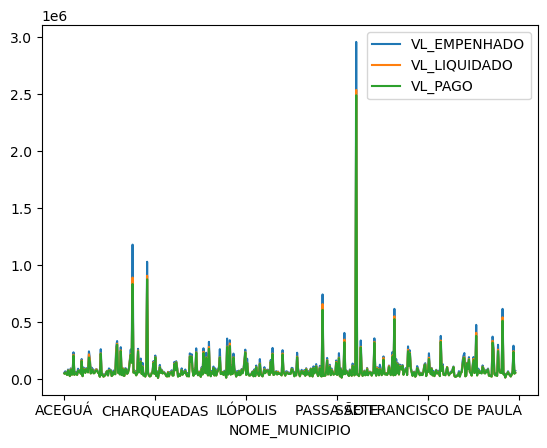

In [56]:
import matplotlib.pyplot as plt
plot_data.plot()
